# Walker-fetal mega

In [45]:
library(data.table)
library(tidyverse)
library(VennDiagram)
library(ggpubr)

In [8]:
walker.perm <- fread("../../temp/walker_sum_stats/final_eqtls.txt", data.table = F) %>% filter(st < 0.05)
walker.nominal <- fread("../../temp/walker_sum_stats/fetal_fdr.05_info.txt", data.table = F)
mixed.perm <- fread("../results/mixed_perm_90hcp/sig_pheno_aFC.txt", data.table = F)
mixed.nominal <- fread("../results/mixed_nominal_90hcp/significant_assoc.txt", data.table = F)

In [3]:
dim(walker.perm)
length(unique(walker.perm$pid))
dim(mixed.perm)
length(unique(mixed.perm$pid))

[1] 6549    8

[1] 6546

[1] 10094    15

[1] 10094

In [9]:
walker.perm <- walker.perm %>% 
    unite('snpID', sid_chr, sid_pos, sep = ':') %>% 
    unite('gene_snpID', pid, snpID, sep = '-', remove = FALSE)
walker.perm <- walker.perm[!duplicated(walker.perm$gene_snpID),]

In [10]:
dim(walker.perm)

[1] 6546    8

In [12]:
sum(unique(mixed.perm$pid) %in% unique(walker.perm$pid))

[1] 4631

png 
  2

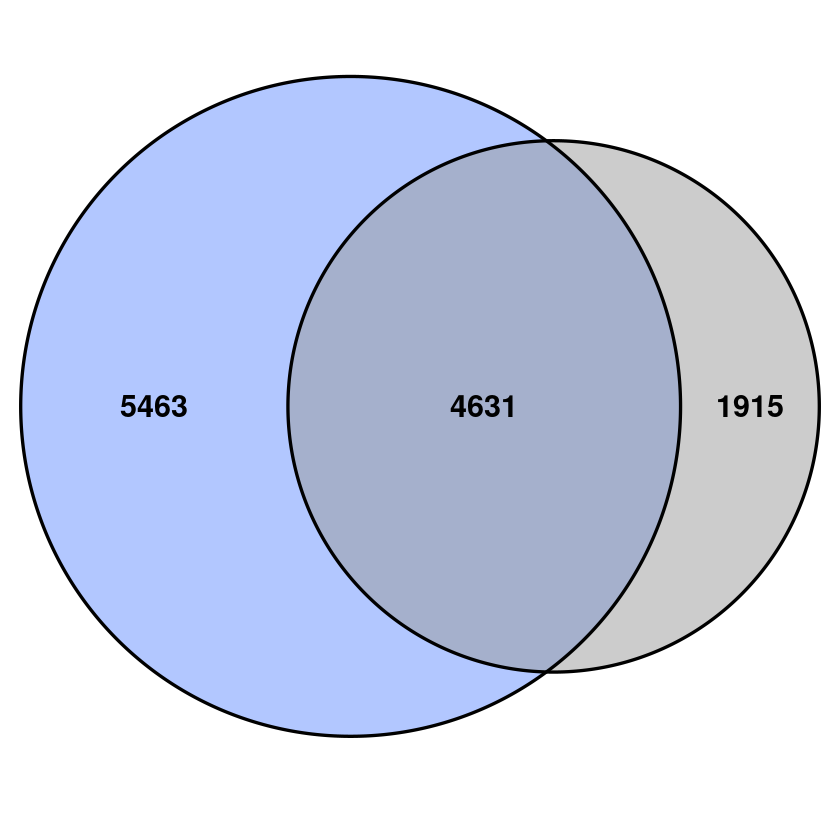

In [15]:
# fetal-walker, perm
venn.plot <- draw.pairwise.venn(10094, 6546, 4631, fill=c("#648FFF", "#999999"),
                                alpha=c(0.5,0.5), cex=1.5, fontface=2, fontfamily=rep("sans",3),
                                cat.cex=1.5,cat.fontface=2, cat.pos=c(-150,150),cat.dist=rep(.05,2),
                                cat.fontfamily=rep("sans",2), 
                                category=c("", ""))
pdf("../figures/walker_fetal.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

In [18]:
sum(unique(mixed.nominal$pid) %in% unique(walker.nominal$V1))

[1] 9542

In [19]:
length(unique(walker.nominal$V1))
length(unique(mixed.nominal$pid))

[1] 11625

[1] 22850

png 
  2

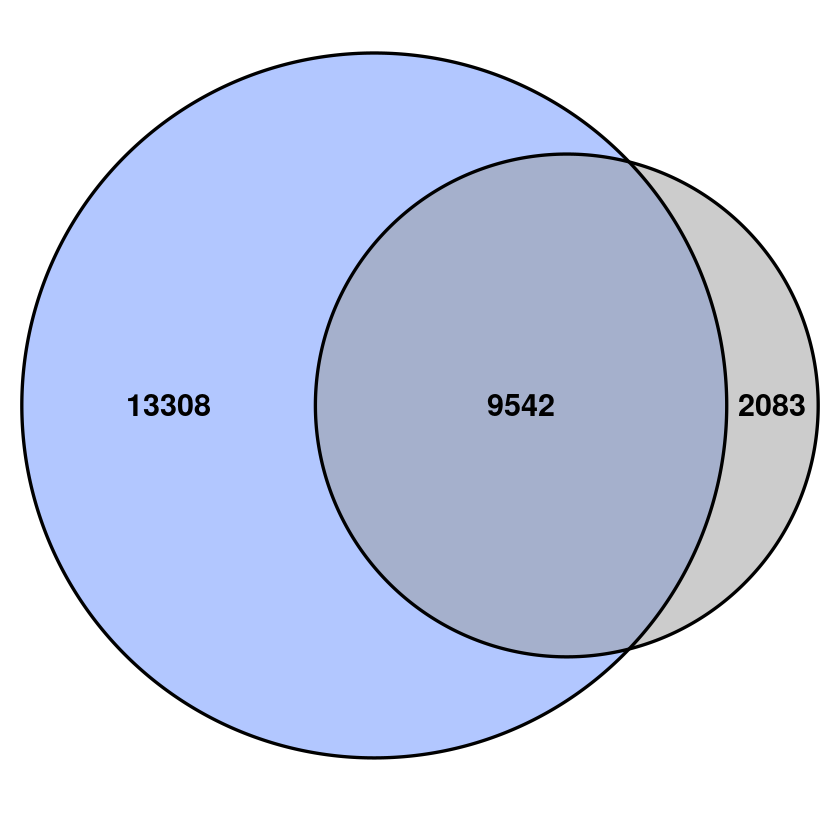

In [20]:
# fetal-walker, nominals
venn.plot <- draw.pairwise.venn(22850, 11625, 9542, fill=c("#648FFF", "#999999"),
                                alpha=c(0.5,0.5), cex=1.5, fontface=2, fontfamily=rep("sans",3),
                                cat.cex=1.5,cat.fontface=2, cat.pos=c(-150,150),cat.dist=rep(.05,2),
                                cat.fontfamily=rep("sans",2), 
                                category=c("", ""))
pdf("../figures/walker_fetal_nominal.pdf", width = 4, height = 4)
grid.draw(venn.plot)
dev.off()

In [21]:
walker.nominal <- walker.nominal %>% unite("sid", V7, V8, sep = ":") %>% unite("gene_SNP", V1, sid, sep = "-")

In [23]:
sum(walker.perm$gene_snpID %in% walker.nominal$gene_SNP)

[1] 6539

In [24]:
walker.perm <- walker.perm %>% inner_join(walker.nominal, by = c("gene_snpID" = "gene_SNP"))

In [26]:
dim(walker.perm)

[1] 6542   15

In [28]:
mixed.perm <- mixed.perm %>% unite("SNP", sid_chr, sid_pos, sep = ":") %>% unite("gene_SNP", pid, SNP, sep = "-")

In [29]:
length(unique(walker.perm$gene_snpID))
length(unique(mixed.perm$gene_SNP))
sum(unique(walker.perm$gene_snpID) %in% unique(mixed.perm$gene_SNP))

[1] 6539

[1] 10094

[1] 561

In [32]:
bim <- fread("../../genotype/all_data/isec_R2_greater_than_3/ancestry/filtered.hg19.sorted.bim", data.table = F)

In [35]:
mixed.perm <- mixed.perm %>% inner_join(bim, by = c("sid" = "V2"))

In [36]:
dim(mixed.perm)

[1] 10094    18

In [37]:
walker.df <- walker.perm %>% select(gene_snpID, V5, V9, V10)
mixed.df <- mixed.perm %>% select(gene_SNP, slope, V5, V6)
df <- walker.df %>% inner_join(mixed.df, by = c("gene_snpID" = "gene_SNP"))
dim(df)

[1] 562   7

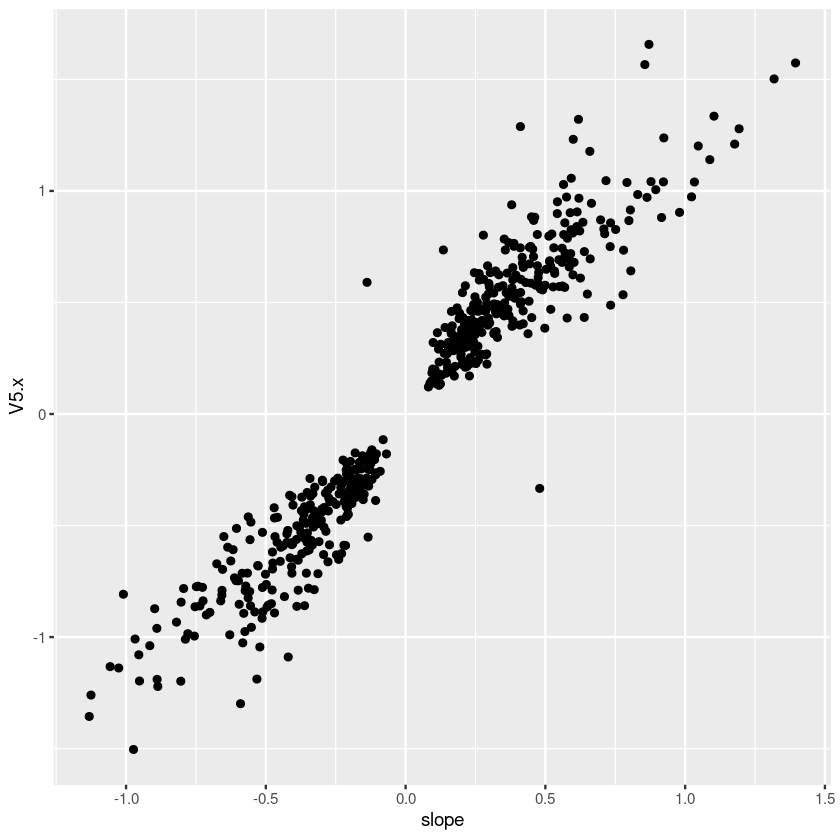

In [39]:
ggplot(df, aes(x = slope, y = V5.x)) +
    geom_point()

In [40]:
df <- df %>% filter(V9 == V6, V10 == V5.y)
dim(df)

[1] 562   7

`geom_smooth()` using formula 'y ~ x'



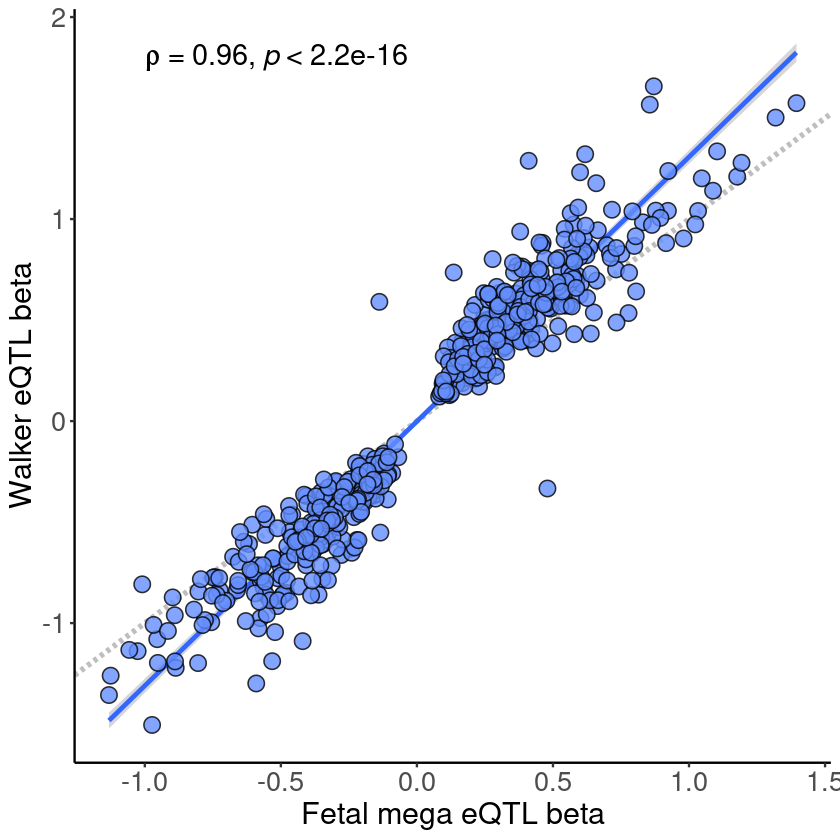

In [43]:
ggplot(df, aes(x = slope, y = V5.x)) +
    geom_abline(intercept = 0, slope = 1, color = "grey", linetype = "dashed", size = 1.2) +
    geom_smooth(method = "lm") +
    geom_point(size = 4, fill = "#648FFF", shape = 21, alpha = 0.8) +
    labs(x = "Fetal mega eQTL beta", y = "Walker eQTL beta") +
    theme_classic() +
    theme(axis.text = element_text(size = 16),
          axis.title = element_text(size = 18)) +
    stat_cor(method = "spearman", label.x = -1, label.y = 1.8, cor.coef.name = "rho", size = 6)

In [44]:
ggsave("../figures/walker_fetal_beta.pdf", height = 6, width = 6)

`geom_smooth()` using formula 'y ~ x'

